1. Use fig.add[h/v]line()_ and fig.add[h/v]rect()_ to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset. 

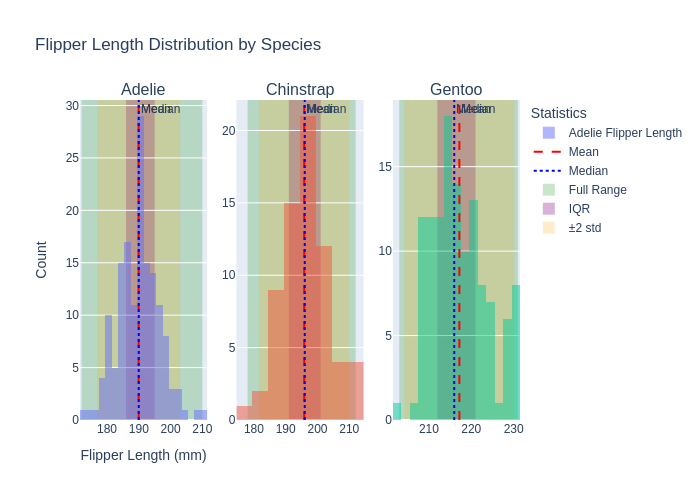

In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in the 'flipper_length_mm' column
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Group by species and get flipper length statistics
species_stats = pingees.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'min', 'max', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75), 'std'])

# Rename IQR columns for clarity
species_stats.columns = ['mean', 'median', 'min', 'max', 'Q1', 'Q3', 'std']
species_stats['range_min'] = species_stats['mean'] - 2 * species_stats['std']
species_stats['range_max'] = species_stats['mean'] + 2 * species_stats['std']

# Create subplots (one for each species)
fig = make_subplots(rows=1, cols=3, subplot_titles=pingees['species'].unique())

# Loop over species to create individual histograms and plot them in subplots
for i, species in enumerate(pingees['species'].unique(), start=1):
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    stats = species_stats.loc[species]
    
    # Add histogram for each species
    fig.add_trace(go.Histogram(x=species_data, name=f"{species} Flipper Length", showlegend=(i == 1)), row=1, col=i)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=stats['mean'], line=dict(color='red', dash='dash'), row=1, col=i, annotation_text="Mean", name="Mean", showlegend=(i == 1))
    fig.add_vline(x=stats['median'], line=dict(color='blue', dash='dot'), row=1, col=i, annotation_text="Median", name="Median", showlegend=(i == 1))
    
    # Add shaded rectangles for ranges
    # Full range
    fig.add_vrect(x0=stats['min'], x1=stats['max'], fillcolor="green", opacity=0.2, layer="below", line_width=0, row=1, col=i, name="Full Range", showlegend=(i == 1))
    # IQR (Interquartile Range)
    fig.add_vrect(x0=stats['Q1'], x1=stats['Q3'], fillcolor="purple", opacity=0.3, layer="below", line_width=0, row=1, col=i, name="IQR", showlegend=(i == 1))
    # Two standard deviations from the mean
    fig.add_vrect(x0=stats['range_min'], x1=stats['range_max'], fillcolor="orange", opacity=0.2, layer="below", line_width=0, row=1, col=i, name="±2 std", showlegend=(i == 1))

# Update layout for better visualization
fig.update_layout(
    title="Flipper Length Distribution by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    showlegend=True,
    legend_title_text="Statistics"
)

fig.update_traces(opacity=0.5)
fig.show(renderer="png")

2.Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots. 

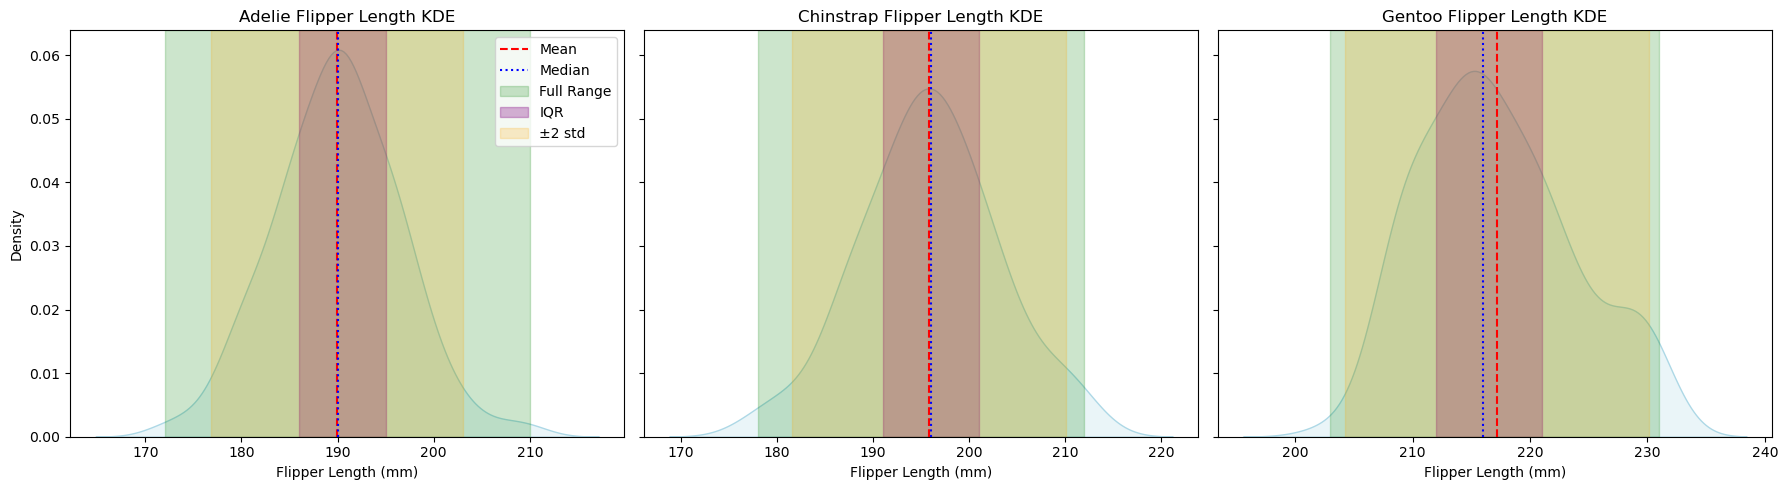

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in the 'flipper_length_mm' column
pingees = pingees.dropna(subset=['flipper_length_mm'])

# Group by species and calculate flipper length statistics
species_stats = pingees.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'min', 'max', 
                                                                   lambda x: np.percentile(x, 25), 
                                                                   lambda x: np.percentile(x, 75), 
                                                                   'std'])

# Rename IQR columns for clarity
species_stats.columns = ['mean', 'median', 'min', 'max', 'Q1', 'Q3', 'std']
species_stats['range_min'] = species_stats['mean'] - 2 * species_stats['std']
species_stats['range_max'] = species_stats['mean'] + 2 * species_stats['std']

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop over species to create individual KDE plots
for i, species in enumerate(pingees['species'].unique()):
    species_data = pingees[pingees['species'] == species]['flipper_length_mm']
    stats = species_stats.loc[species]
    
    # Plot KDE for each species
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='lightblue')
    
    # Add vertical lines for mean and median
    axes[i].axvline(stats['mean'], color='red', linestyle='--', label='Mean')
    axes[i].axvline(stats['median'], color='blue', linestyle=':', label='Median')
    
    # Add shaded areas for ranges
    # Full range
    axes[i].axvspan(stats['min'], stats['max'], color='green', alpha=0.2, label='Full Range')
    # IQR (Interquartile Range)
    axes[i].axvspan(stats['Q1'], stats['Q3'], color='purple', alpha=0.3, label='IQR')
    # Two standard deviations from the mean
    axes[i].axvspan(stats['range_min'], stats['range_max'], color='orange', alpha=0.2, label='±2 std')
    
    # Set title and labels
    axes[i].set_title(f"{species} Flipper Length KDE")
    axes[i].set_xlabel("Flipper Length (mm)")

# Set common Y-axis label
axes[0].set_ylabel("Density")

# Add a legend only to the first subplot (to avoid clutter)
axes[0].legend()

# Adjust layout for better spacing
fig.tight_layout()

# Save the figure as a PNG file
plt.savefig("flipper_length_kde.png", dpi=300)  # Specify the filename and adjust dpi as needed

# Show the figure
plt.show()

ChatBot Session: https://chatgpt.com/share/66f0a153-b964-8009-88a9-ffbb681e8478

Summary: 

In this conversation, we worked on visualizing the flipper length distribution of penguins from the Seaborn penguins dataset using Plotly and Seaborn for advanced data visualization.

1. Plotly Histogram with Annotations:
You requested histograms for each species of penguins with vertical lines (indicating the mean and median) and shaded rectangles (representing the full range, IQR, and ±2 standard deviations from the mean). These were added to Plotly histograms, organized in three subplots with a clear legend for interpretation.
2. Seaborn KDE Plots:
Next, you asked to replace histograms with Seaborn Kernel Density Estimation (KDE) plots. We used Seaborn’s kdeplot function and combined it with Matplotlib’s fill_between() and axvspan() for shading and marking ranges. These KDE plots were also organized into a row of three subplots (one for each species).
3. Seaborn Style and Boxplot:
Finally, we applied Seaborn's styling (sns.set_style("whitegrid") and sns.set_palette("colorblind")) to improve the aesthetics and accessibility of the plots. Additionally, we introduced a boxplot using sns.boxplot() with a hue parameter to visualize the distribution of flipper lengths per species.

3.Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference.

Box Plots: 

A way of displaying the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also shows outliers as individual points.
Pros: Easy to identify outliers, shows the skewness of data in a compact visual, doesn't require binning 
Cons: Less intuative, does not reveal precise shape of the distribution, does not show the frequency in distribution (mean/mode)

Histograms: 

A chart that represents a continuous set of data organized into intervals called bins, and the frequency of values within the intervals.
Pros: Easy to understand, shows the distribution of the data (normal, skewed, bimodal, etc.), highlights frequency
Cons: Results depend heavily on the number of bins (choice may misrepresent the data), does not provide summary statistics (quartiles, outliers)

Kernel Density Estimator

A smoothed curve representing the probability density function of a continuous random variable. It smooths out the data using a kernel (usually Gaussian) and a bandwidth parameter to create a continuous estimate of the distribution.
Pros: Does not require bins, clear data representation, depends on the choice of bandwidth (too small leads to many peaks and too large leads to loss of detail), doesn't show exact frequencies


My preference of these three "data distribution" visualization methods is a histogram. I find it the clearest way to view the distribution of the data and the frequency in distribution. I also find it convenient that you can customize the number of bins which allows you to get more accurate displays of the data. 

4.Run the code below and look at the resulting figure of distrubutions and then answer the following questions

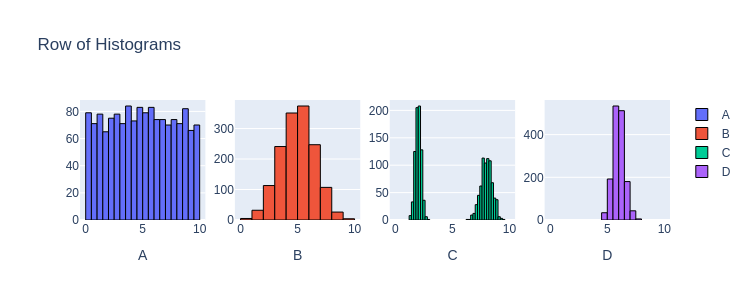

In [11]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [43]:
means = [np.mean(data1), np.mean(data2), np.mean(data3), np.mean(data4)]
variances = [np.var(data1), np.var(data2), np.var(data3), np.var(data4)]
print (means)
print (variances)

[4.942190945155684, 4.949800411472856, 4.999762244718494, 6.007793262725317]
[8.374183098778891, 2.1075634367865486, 9.137615060333978, 0.24188756941130815]


Similar is defined as abs(value1-value2) < 1.

4.1. Which datasets have similar means and similar variances?

- Datasets (1,3) have similar means and variances.

4.2. Which datasets have similar means but quite different variances?

- Datasets (1,2), and (2,3) have similar means but quite different variances.

4.3. Which datasets have similar variances but quite different means?

- No datasets have similar variences but quite different means.

4.4. Which datasets have quite different means and quite different variances?

- Datasets (1,4), (2,4), and (3,4) have quite different means and variances.

ChatBot Session: https://chatgpt.com/share/66f0b5ce-4f84-8009-8c70-2c560803f1ab

Summary:

1.Datasets Analysis: You shared a code snippet using SciPy and Plotly to generate and visualize four datasets. You wanted to analyze these datasets based on their means and variances.
2.Statistical Comparison: I provided a code snippet to calculate the means and variances of the datasets and classify them based on their similarities and differences.
3.TypeError Issue: You encountered a TypeError related to the variance function. I suggested specifying the ddof parameter when calculating variance to resolve this error.
4.Revised Code: I provided an updated version of the code that included the correct usage of the variance function.

5.Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

The relationship between the mean and median in a dataset is closely tied to the skewness of the data distribution. In a right-skewed (positively skewed) distribution, the mean is typically greater than the median. This occurs because extreme high values, or outliers, pull the mean upward, while the median remains more stable, as it is less affected by these outliers. 

Conversely, in a left-skewed (negatively skewed) distribution, the mean is generally less than the median. Here, extreme low values pull the mean downward, while the median stays closer to the central portion of the data. 

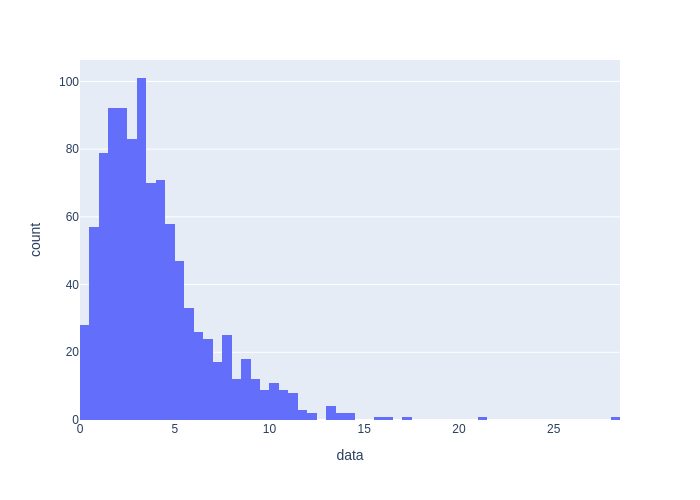

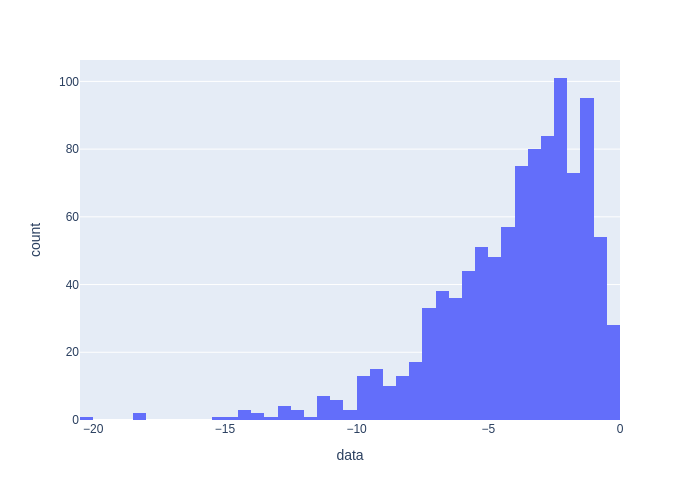

In [12]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig1.show(renderer="png")
fig2.show(renderer="png")

ChatBot Session: https://chatgpt.com/share/66f0d092-a8e4-8009-8a3a-e8b94e0e4e24

Summary:

1.Relationship Between Mean, Median, and Skewness:
Right-skewed (positively skewed): The mean is greater than the median due to a long tail on the right side (higher values pulling the mean up).
2.Left-skewed (negatively skewed): The mean is less than the median because of a long tail on the left side (lower values pulling the mean down).
The median is more robust to extreme values compared to the mean.
3.Code Explanation:
The code uses the Gamma distribution to create a right-skewed dataset (sample1) and visualizes it with a histogram.
The mean and median of sample1 are calculated, demonstrating the skewness.
A left-skewed dataset (sample2) is created by negating the values from another Gamma distribution, flipping its skew.

6.Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data.

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [26]:
df.isna().sum()

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64

In [3]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


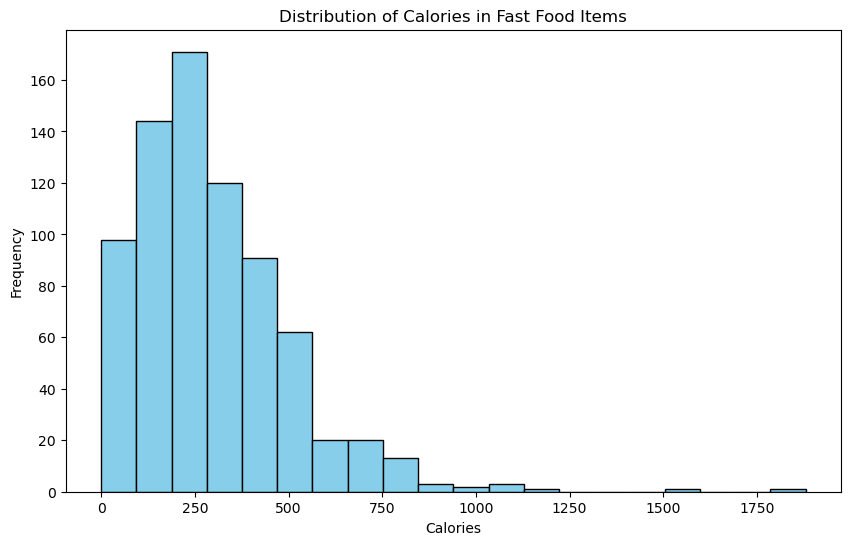

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram for a specific column, e.g., 'calories'
ax.hist(df['calories'], bins=20, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Calories in Fast Food Items')
ax.set_xlabel('Calories')
ax.set_ylabel('Frequency')

# Save the histogram as a PNG file
plt.savefig("calories_histogram.png", dpi=300)  # Specify the filename and adjust dpi as needed

# Show the histogram
plt.show()


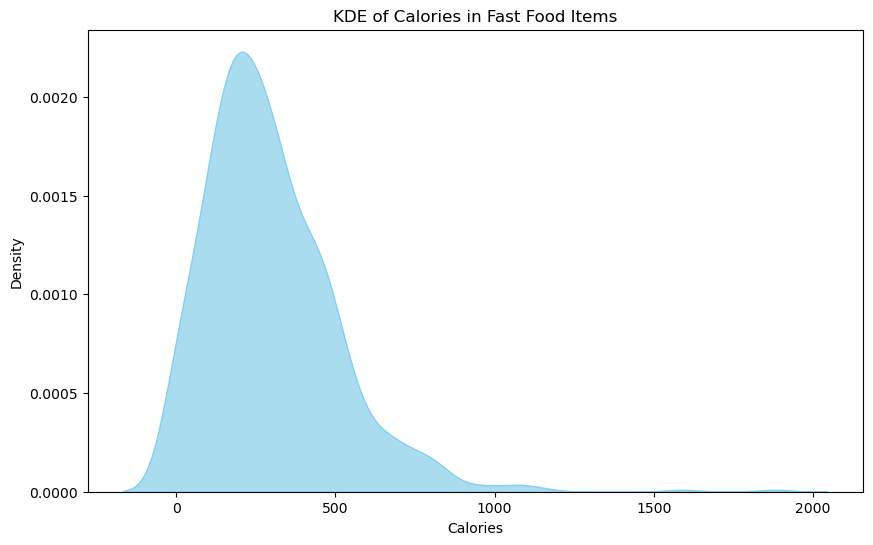

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create a KDE plot for the 'Calories' column
sns.kdeplot(df['calories'], ax=ax, fill=True, color='skyblue', alpha=0.7)

# Set plot titles and labels
ax.set_title('KDE of Calories in Fast Food Items')
ax.set_xlabel('Calories')
ax.set_ylabel('Density')

# Save the figure as a PNG file
plt.savefig("kde_calories.png", dpi=300)  # Specify the filename and adjust dpi as needed

# Show the figure
plt.show()

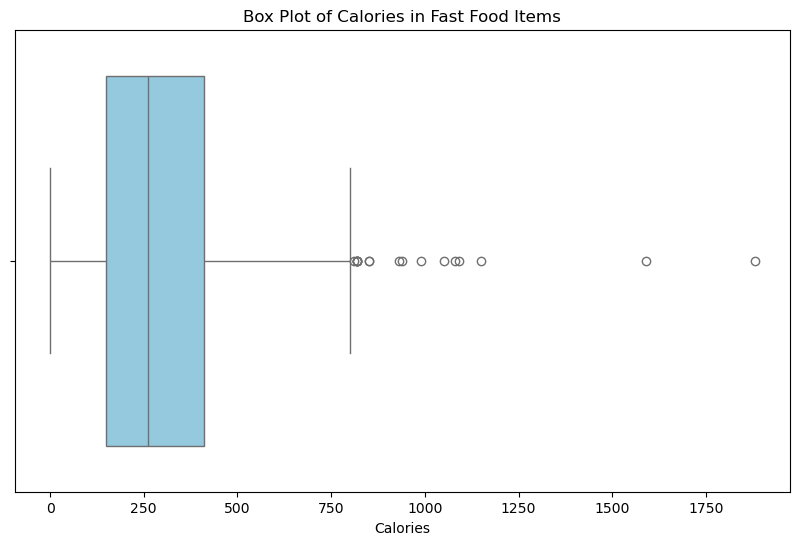

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot for the 'Calories' column
sns.boxplot(x=df['calories'], ax=ax, color='skyblue')

# Set plot titles and labels
ax.set_title('Box Plot of Calories in Fast Food Items')
ax.set_xlabel('Calories')

# Save the figure as a PNG file
plt.savefig("boxplot_calories.png", dpi=300)  # Specify the filename and adjust dpi as needed

# Show the figure
plt.show()

ChatBot Session: https://chatgpt.com/share/66f1ccae-43c8-8009-880d-0cbece1b5c1c

Summary:

1.Histogram Creation: You requested help in creating a histogram from a dataset. I provided code to load the data using Pandas and plot a histogram using Matplotlib and Seaborn, focusing on the 'Calories' column.
2.KDE Plot Creation: You asked for guidance on creating a Kernel Density Estimate (KDE) plot for the dataset. I shared a step-by-step guide and code for visualizing the KDE of the 'Calories' column.
3.Box Plot Creation: You sought assistance in creating a box plot from the same dataset. I provided code to generate a box plot for the 'Calories' column using Seaborn and Matplotlib.

7.Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish).

8.Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters.

In [71]:
# Step 1: Import the necessary libraries
import plotly.express as px

# Step 2: Load the dataset
df = px.data.gapminder()

# Step 3: Create the scatter plot
fig = px.scatter(df, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name",
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005,0.005]) 

# Step 4: Show the plot
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: percent change

9.Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.